Before analyzing any dataset we have to import our libraries into Python. Continue from here tomorrow. 

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
import os
print(os.getcwd())

/Users/jamshedmaqsudov/EDA_Learning_Journey


In [48]:
df_airline = pd.read_csv("/Users/jamshedmaqsudov/EDA_Learning_Journey/airline_analysis_flight.csv")

In [52]:
df_airline.head(10)

miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   
5   2076         196      0           Yes                    Yes   
6   1100         214      0            No                    Yes   
7   2012         200      0           Yes                    Yes   
8   1055         203      0            No                    Yes   
9   1123         204      0            No                     No   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   
5           Yes      Friday     No     Yes      435.670           1623.74   
6           Yes   Wednesday     No      No      270.080           1279.40   
7           Yes      Friday     No     Yes      467.290           1687.73   
8           Yes      Sunday     No     Yes      407.955           1468.41   
9           Yes    Saturday     No     Yes      349.315           1475.21   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
5      4  
6      2  
7      4  
8      2  
9      2

                                                        (1) Question

1. What do coach ticket prices look like?
2. What are the high and low values?
3. What would be considered average?
4. Does $500 seem like a good price for a coach ticket?

In [54]:
df_airline.coach_price.describe()

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64

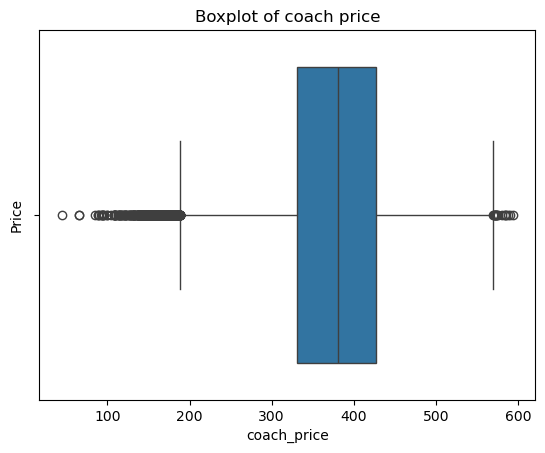

In [55]:
import seaborn as sns
sns.boxplot(x=df_airline['coach_price'])
plt.title("Boxplot of coach price")
plt.ylabel("Price")
plt.show()

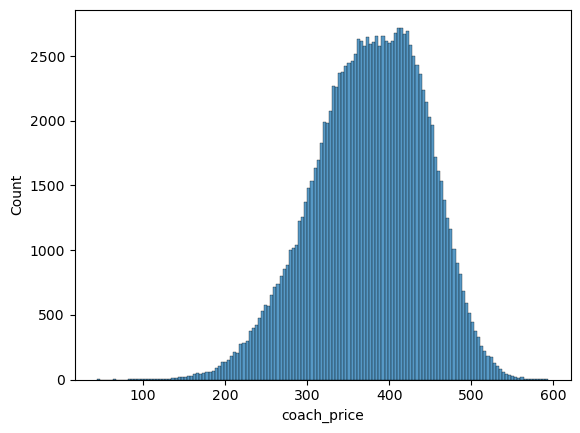

In [56]:
sns.histplot(data = df_airline, x ='coach_price')
plt.show()

                                                             (1) ANSWER
                                                             
Here how the coach price ticket distribution look like :
- Average : 377
- Highest -593
- lowest - 44

  In this visualization we see that the histogram for instance look like a normal distribution. The histogram is fairly symmetric and slightly skewed to the right. The 500 goes the the category of an expensive price since it is close to the tail of the histogram. 
 

                                                    (2)QUESTION

Now visualize the coach ticket prices for flights that are 8 hours long.

1. What are the high, low, and average prices for 8-hour-long flights? 
2. Does a 500$ ticket seem more reasonable than before?

                                                    (2) ANSWER:

- High - 593
- Average- 431
- Low - 431

Yes that seems a bit ok since the average is 431 . So the answer is YES.

It is closer to the center of the plot now than it was before, but still it is not an average price. 

Yes it is now close to the summary stats that it was before.



  1. Yes. It is a bit closer, since the average price for coach ticket that is 8hours cost 431  which makes it closer to 500 $
  2. Yes. In compare to the precious one , it is closer to the summary stats.  


In [59]:
df_airline_long_flights = df_airline[df_airline["hours"]==8] 

In [60]:
df_airline_long_flights.head(2)

miles  passengers  delay inflight_meal inflight_entertainment  \
75   4182         209      0           Yes                    Yes   
81   4158         213      0            No                    Yes   

   inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
75           Yes   Wednesday     No      No       416.32           1441.36   
81           Yes    Saturday     No     Yes       474.35           1712.92   

    hours  
75      8  
81      8

In [61]:
df_airline_long_flights.coach_price.describe()

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

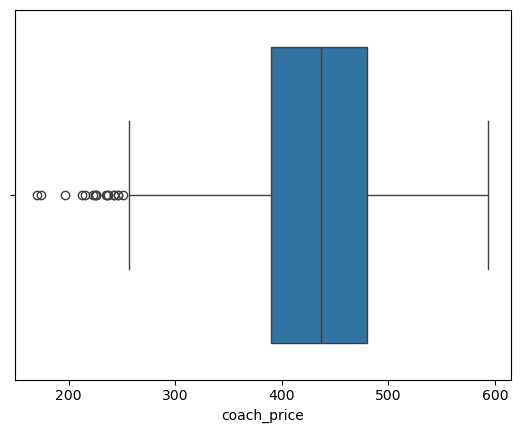

In [62]:
sns.boxplot(x=df_airline_long_flights.coach_price)
plt.show()

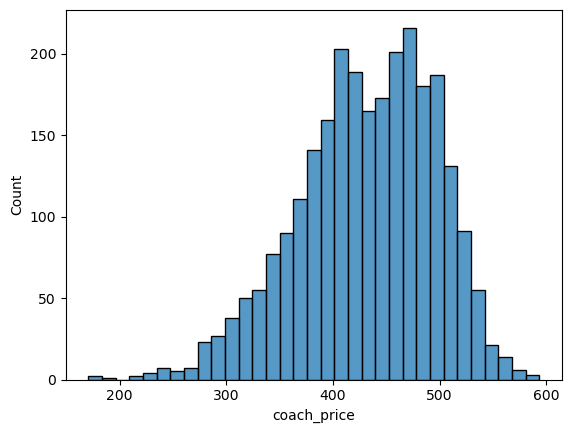

In [63]:
sns.histplot(data = df_airline_long_flights, x= "coach_price")
plt.show()

                                            (2)
                                            
                                HISTOGRAM WITH LONG HOUR LONG FLIGHTS

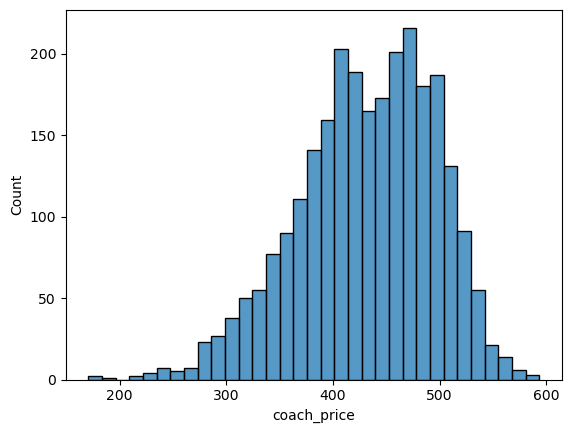

<Figure size 640x480 with 0 Axes>

In [65]:
sns.histplot(df_airline.coach_price[df_airline.hours ==8])
plt.show()
plt.clf()

                                                        Question 3 : 
How are flight delay times distributed? 

Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. 

What kinds of delays are typical?

To find out what kinds of delays are typical, we need to fist understand our data in general and also with specifically with the delay column by the following command : 
1.  head(),
2.  info()
3. describe()

In [68]:
df_airline.head()

miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2

We have got:

1. 129780 entries in the delay column
2. without null values

In [70]:
df_airline.delay.info()

<class 'pandas.core.series.Series'>
RangeIndex: 129780 entries, 0 to 129779
Series name: delay
Non-Null Count   Dtype
--------------   -----
129780 non-null  int64
dtypes: int64(1)
memory usage: 1014.0 KB


## With the describe we give the summary stats of the column. 
We are getting the folllowing insights: 

- total entries : 129780
- average delay : 13.16
- min : 0
- max delay : 1560m meaning 26hours .
- std is :41.9
- 25% : 9m
- 50: 10m
- 75: 13m

Mian insight from this data:  
- We have extreme value of outlier which distort the analysis and pulls up the mean to 13minutes , with the median whihc is 50% we can see that the average delay is 10minutes

In [73]:
df_airline.delay.describe()

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

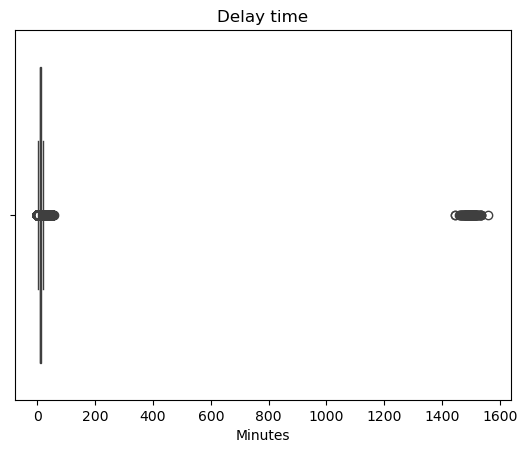

In [74]:
#with seaborn lybrary we illustrate the outlier 
sns.boxplot(x=df_airline['delay'])

#we adding labels for clarity
plt.title("Delay time")
plt.xlabel("Minutes")

#show the plot
plt.show()

## How to choose a threshold wisely?

we use the quantile to see whare the 99% of the data lies 

- we identify here the threshhold to remove the outliers
- understand the distribution shape and tale behaviour
- make a better choice about what range of data to include.

In [76]:
#we use quantile to see at what range 99% of our delays are

df_airline['delay'].quantile(0.99)

38.0

In this part of the code we are trying to remove the outlier in our data  by creating a new data frame. Generally we keep that specific outlier in the original dataframe but for us to better understand the trends and patterns in delats we remove the outlier. 

How it it is done?

create a new df which is "flight_no_outliers", and from out original DF : 

df_airline[df_airline["delay"] <=60]   : this syntax is called boolian indexing 

filtering to give us equal to 60 minutes or less which is much more reasonable. 

In [78]:
#we are subset our data into specific ranges.

flight_no_outliers = df_airline[df_airline['delay'] <=60]

Now with describe () function in pandas we are the summary stats:

We see that we have different sum stats:

- average delay is 12min
- min is 0
- max is 58
- std is 7.7

In [80]:
flight_no_outliers.delay.describe()

count    129680.000000
mean         12.018530
std           7.793645
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max          58.000000
Name: delay, dtype: float64

So this boxplot shows that the typical flight delay time is 10minutes

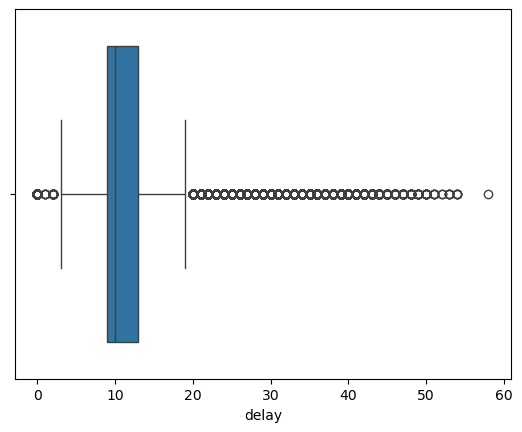

In [82]:
#with seaborn lybrary we illustrate the outlier 

sns.boxplot(x=flight_no_outliers['delay'])


#show the plot
plt.show()

## Bivariate Analysis


What is bivariate analysis ?

BA - is a statistical method used to explore the relationship between two variables. The goal is to determine whether there is an association, correlation, or cause-and-effect relationship between them.

It can involve:

	•	Two numerical variables (e.g., height vs. weight)
	•	One numerical and one categorical variable (e.g., income vs. gender)
	•	Two categorical variables (e.g., education level vs. employment status)

                                                        ## Question 4
Create a visualization that shows the relationship between **coach** and **first-class** prices.

- What is the relationship between these two prices? 
- Do flights with higher coach prices always have higher first-class prices as well?

In [85]:
df_airline.head()

miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2

In our case we are doing a bivariate analysis with two numerical variables such as coach_price and firstclass_price.


So the best best vusualizatio technique for doing bevariate analysis is a **SCATTERPLOT**

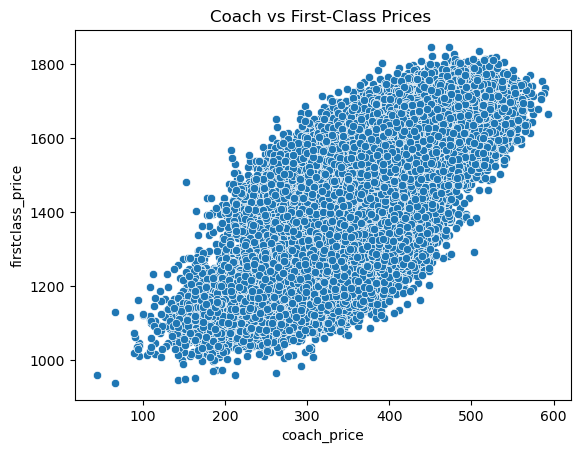

In [87]:
sns.scatterplot(
    data=df_airline,
    x='coach_price',
    y='firstclass_price'
)
plt.title('Coach vs First-Class Prices ')
plt.show()

    This  simple scatterplot between coach prices and first-class prices, you will see that there are too many data points which makes it difficult to see the nuanced relationship between these two features. 

In [89]:
df_airline.head()

miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2

You might try **changing the opacity** on the points to see if the mass of data points is extra packed in a certain area. 

You could also try **taking a random sample** from the data set to see what a **less busy version** of this plot may look like.

But what might be the most helpful could be adding a LOWESS smoother through the plot.

This can be done using the following code:

sns.lmplot(x = x_var, y = y_var, data = flight, line_kws={'color': 'black'}, lowess=True)


continue from here ......................

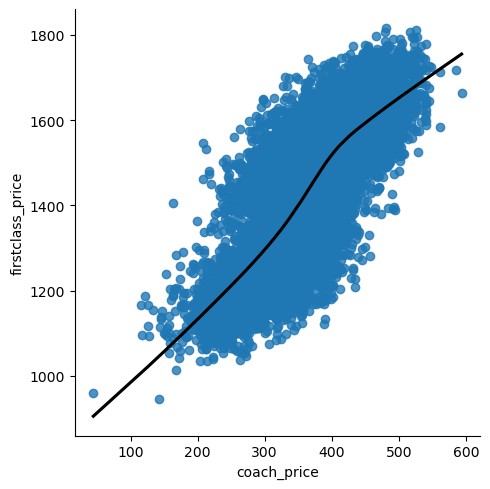

<Figure size 640x480 with 0 Axes>

In [92]:
perc = 0.1
df_airline_sub = df_airline.sample(n = int(df_airline.shape[0]*perc))

sns.lmplot(x = "coach_price", 
           y = "firstclass_price", 
           data = df_airline_sub, 
           line_kws={'color': 'black'}, 
           lowess=True)
plt.show()
plt.clf()

5.
What is the relationship between

coach prices and inflight features:
  
  1. inflight meal,
  2. inflight entertainment, and
  3. inflight WiFi?
 
     Which features are associated with the highest increase in price?

Generally the inflight entertainment and WiFi make a bit the coach price higher, which is almost 400$. 
We came make a conclusion that the average the coach price gets 400 with the inflight features. 

In [94]:
df_airline.head()

miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2

Boxplot to understanding the correlation between the variables

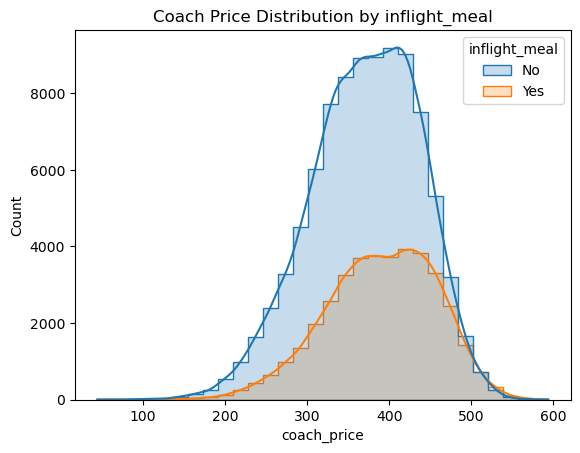

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Coach_Price colored by Is_Promotional
sns.histplot(
    data=df_airline, 
    x='coach_price', 
    hue='inflight_meal', 
    bins=30, 
    kde=True, 
    element='step')
plt.title('Coach Price Distribution by inflight_meal')
plt.show()

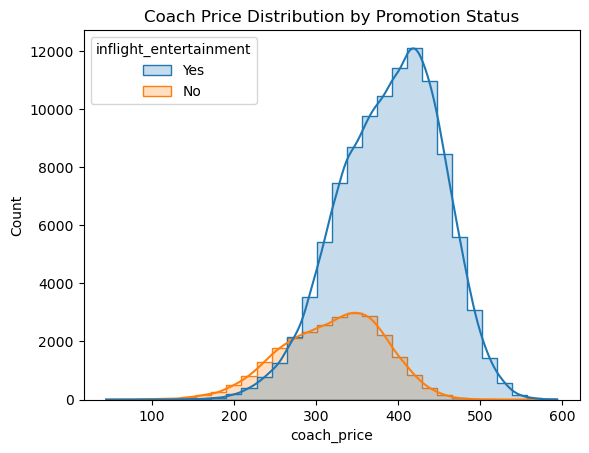

In [97]:

# Histogram of Coach_Price colored by Is_Promotional
sns.histplot(
    data=df_airline, 
    x='coach_price', 
    hue='inflight_entertainment', 
    bins=30, 
    kde=True, 
    element='step')
plt.title('Coach Price Distribution by Promotion Status')
plt.show()

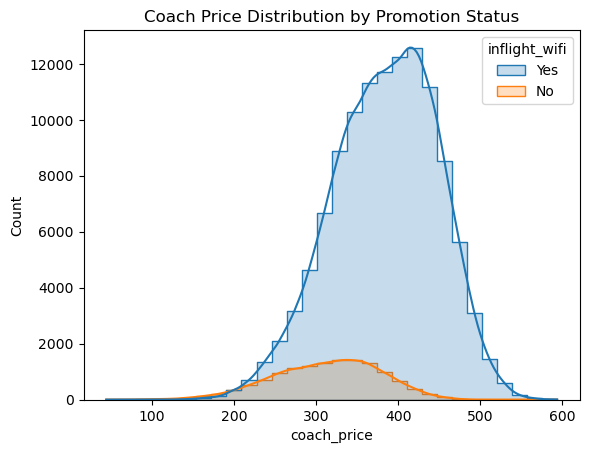

In [98]:

# Histogram of Coach_Price colored by Is_Promotional
sns.histplot(
    data=df_airline, 
    x='coach_price', 
    hue='inflight_wifi', 
    bins=30, 
    kde=True, 
    element='step')
plt.title('Coach Price Distribution by Promotion Status')
plt.show()

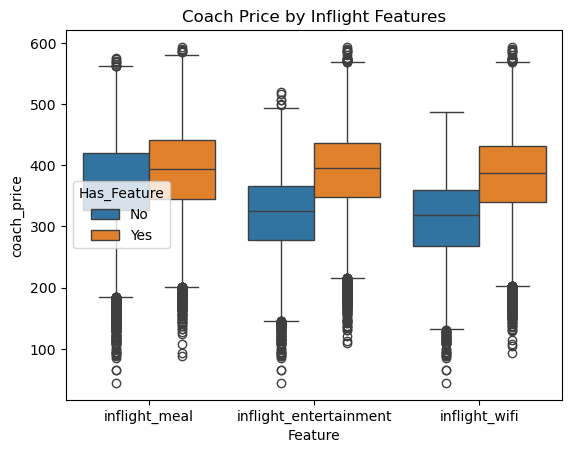

In [99]:
# Example: melt the inflight features columns
inflight_cols = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']

df_melted = df_airline.melt(id_vars='coach_price', value_vars=inflight_cols,
                    var_name='Feature', value_name='Has_Feature')

sns.boxplot(x='Feature', y='coach_price', hue='Has_Feature', data=df_melted)
plt.title('Coach Price by Inflight Features')
plt.show()

In [100]:
df_airline.head()

miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2

How does the number of passengers change in relation to the length of flights?

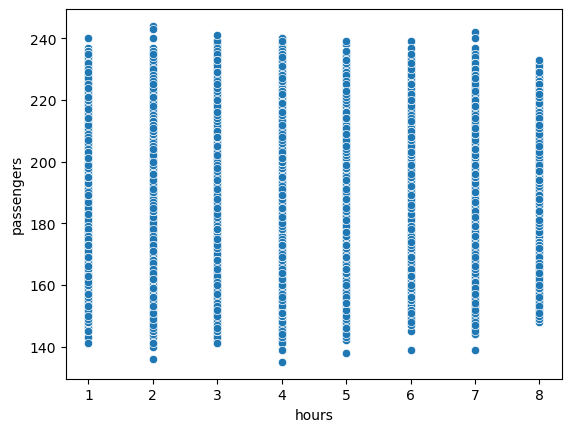

In [102]:
sns.scatterplot(
    data=df_airline,
    x='hours',
    y='passengers'
)
plt.show()

In [232]:
df_airline[["hours", "passengers"]].head()

hours  passengers
0      1         172
1      6         214
2      3         212
3      2         213
4      2         217

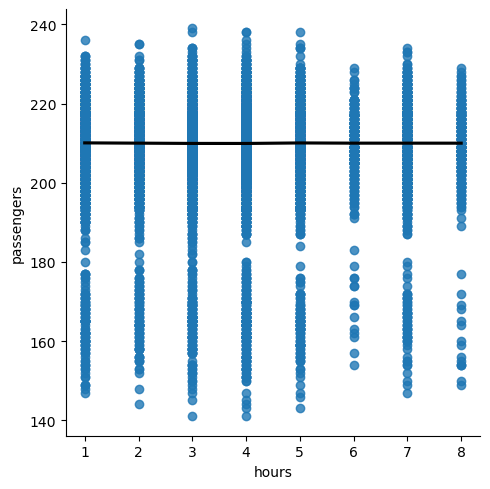

<Figure size 640x480 with 0 Axes>

In [104]:
perc = 0.1
df_airline_sub = df_airline.sample(n = int(df_airline.shape[0]*perc))

sns.lmplot(x = "hours", 
           y = "passengers", 
           data = df_airline_sub,
           line_kws={'color': 'black'}, 
           lowess=True)
plt.show()
plt.clf()

- MULTIVARIATE ANALYSIS

Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

In [228]:
df_airline[["weekend", "day_of_week"]].head()

weekend day_of_week
0     Yes      Sunday
1     Yes      Sunday
2     Yes      Friday
3     Yes    Saturday
4      No      Monday

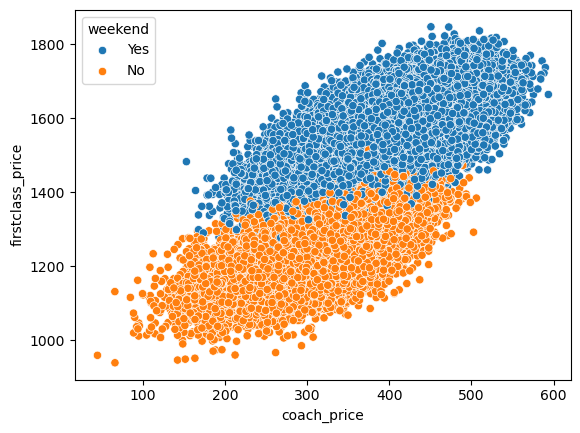

In [200]:
sns.scatterplot(
        x="coach_price",
        y="firstclass_price",
        hue="day_of_week",
        data=df_airline)
plt.show()

While performing multivariate analysis , the scatterplot gives us an insight :

- there is a general trend that shows with the blue colors that are high meaning the price is high on the weekend, meaning that yes there is a clear trend that on the weekends the price are higher that on weekdays.

However, the scatterplot does not give us accurate insights on weather the price of the coach and firstclass which one of the colors in teh scatterplot is coacha and fistclass. Thats why it is better to use a boxplot to see the difference

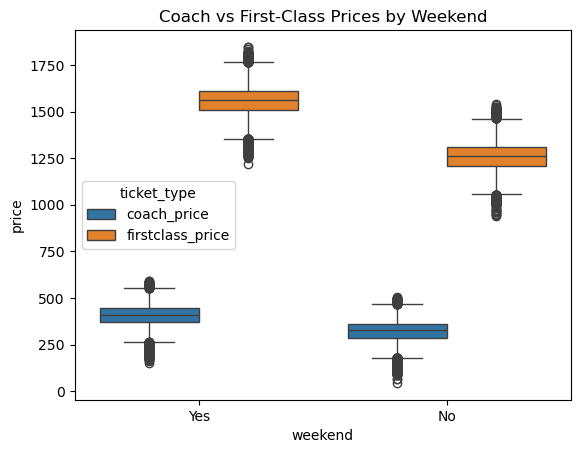

<Figure size 640x480 with 0 Axes>

In [216]:
import matplotlib.pyplot as plt

# Melt the DataFrame to long format for easier plotting
df_melted = pd.melt(
    df_airline,
    id_vars=['weekend'],
    value_vars=['coach_price', 'firstclass_price'],
    var_name='ticket_type',
    value_name='price'
)

# Plot boxplot
sns.boxplot(x='weekend', y='price', hue='ticket_type', data=df_melted)
plt.title('Coach vs First-Class Prices by Weekend')
plt.show()
plt.clf()


In the above boxplot we get much more insights into the general trend, again it confirms the following insights:

- There is clearly a pattern that the average price in the weekends changes

More important insights here is that:

- first class average price is significantly higher than the coach price

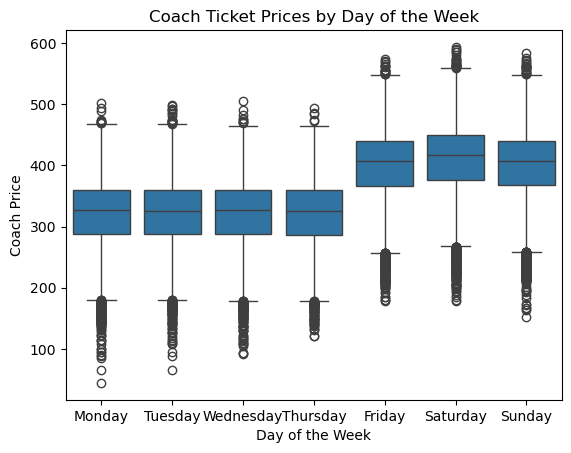

<Figure size 640x480 with 0 Axes>

In [266]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert day_of_week column to ordered categorical type
df_airline['day_of_week'] = pd.Categorical(df_airline['day_of_week'], categories=weekday_order, ordered=True)

sns.boxplot(x='day_of_week', 
            y='coach_price', 
            data=df_airline)
plt.title('Coach Ticket Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Coach Price')

plt.show()
plt.clf()

Certainly its insightful that we are doing here the visualization by day of the week we get the following insights:

- On the Weekdays in shows stable average price is 321
- On Friday, Saturday and Sunday the average price of the coach seats increases to 401/411 meaing it increases 1times more

In [280]:
coach_weekend_stats= df_airline.groupby("day_of_week", observed=True)['coach_price'].mean()
coach_weekend_stats

day_of_week
Monday       321.972181
Tuesday      321.652042
Wednesday    321.899667
Thursday     321.127370
Friday       401.523424
Saturday     411.993195
Sunday       401.969673
Name: coach_price, dtype: float64

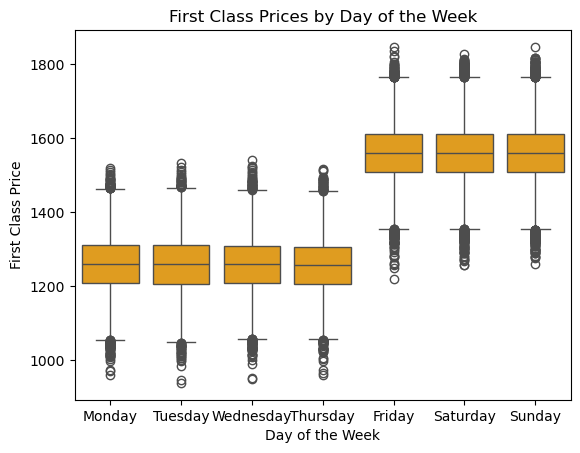

<Figure size 640x480 with 0 Axes>

In [283]:
# Define the correct order for weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert day_of_week column to ordered categorical type
df_airline['day_of_week'] = pd.Categorical(df_airline['day_of_week'], categories=weekday_order, ordered=True)

# Now create the boxplot — it will follow the order of the categorical
sns.boxplot(x='day_of_week', 
            y='firstclass_price', 
            data=df_airline, 
            color='orange')

plt.title('First Class Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('First Class Price')

plt.show()
plt.clf()

With First Class average price we get the follwing insights:

- In the weekdays the avg price of the first class in stable around 1259
- On the weekendsin increases significantly and gets 1559 , meaning 3 times than its oroginal price

In [278]:
firstclass_weekend_stats= df_airline.groupby("day_of_week", observed=True)['firstclass_price'].mean()
print(firstclass_weekend_stats)

day_of_week
Monday       1259.010449
Tuesday      1259.020463
Wednesday    1259.423346
Thursday     1257.044387
Friday       1559.499226
Saturday     1559.812572
Sunday       1559.277094
Name: firstclass_price, dtype: float64



General insights :

- There is a pattern that on Friday, Saturday and Sunday prices increases
- The first class price increases higher than coach price
- The first class avg price is obviuously higher than the coach price, and on weekend it also gets much more expensive than coach price
- So, the “gap” between coach and first-class prices is bigger on weekends, you pay more extra to get first-class on weekends than you do on weekdays

8.
How do coach prices differ for redeyes and non-redeyes on each day of the week?

In [296]:
df_airline[['coach_price', 'redeye', 'day_of_week']]

coach_price redeye day_of_week
0           338.820    Yes      Sunday
1           472.655     No      Sunday
2           351.960     No      Friday
3           387.835     No    Saturday
4           374.735     No      Monday
...             ...    ...         ...
129775      383.240     No      Friday
129776      397.825     No      Friday
129777      380.980     No      Friday
129778      485.185     No    Saturday
129779      446.395     No    Saturday

[129780 rows x 3 columns]

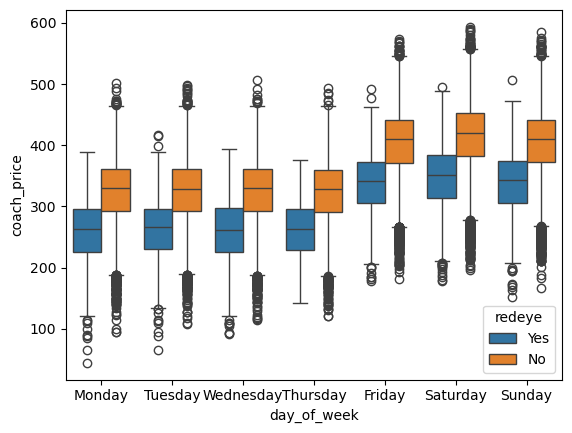

In [298]:
sns.boxplot(
        x='day_of_week',
        y='coach_price',
        hue='redeye',
        data=df_airline
)
plt.show()

In [310]:
dw_red_coach = df_airline.groupby(["day_of_week","redeye" ], observed=False)['coach_price'].mean()
dw_red_coach

day_of_week  redeye
Monday       No        325.120314
             Yes       258.335271
Tuesday      No        324.718128
             Yes       262.127115
Wednesday    No        325.125197
             Yes       257.725428
Thursday     No        324.011555
             Yes       261.606944
Friday       No        405.001369
             Yes       337.155928
Saturday     No        415.460401
             Yes       347.454782
Sunday       No        405.290714
             Yes       339.015085
Name: coach_price, dtype: float64

General insights : 

- The flights that were tooking place **during the day** on the *weekend* were more expensive than the flights took place at night
- On the weekdays are the same like flight during the day is expensive than at night
- So we can conclude that redeye flights are cheaper than during the day but are not very cheap and are close to general trend